In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# To split Train and Test
from sklearn.model_selection import train_test_split

# Model Building
import statsmodels.api as sm

# Confusion Metric based calculation
from sklearn import metrics

# RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# Precision and Recall
from sklearn.metrics import precision_score, recall_score

# Precision and Recall TradeOff

from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
edu_online = pd.read_csv('C:/Users/Anshul/Documents/1.LEARN/IIIT-Data Science/15_CaseStudy_PredAnalytics/leads.csv')
#edu_online = pd.read_csv('C:/Users/tomarax/Downloads/Leads.csv')


In [3]:
edu_online.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# 1 Check for Duplicate ID
print("No Dup Id:",sum(edu_online.duplicated(subset = "Lead Number")) == 0)

No Dup Id: True


In [5]:
#shape of the dataset
edu_online.shape

(9240, 37)

In [6]:

# The following command will tell us the number of rows and number of columns in the dataset
print("The number of rows and columns")
print(edu_online.shape)
print('\n')
# To check the name of the columns, following command can be used
print("The name of all the columns")
print(edu_online.columns)
print('\n')
# The further information of the dataset like datatype of the columns, number of "not null" values etc of each column
print("The next level information of the columns like datatype, null rows, etc")
print(edu_online.info())
print('\n')
# To get the value level details like total count, Max value, Min value, Mean, Median etc can be determined through following command
print("The value level details like count, max, min, mean etc")
print(edu_online.describe())

The number of rows and columns
(9240, 37)


The name of all the columns
Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The

In [7]:
# Checking the percentage of missing values
round(100*(edu_online.isnull().sum()/len(edu_online.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
## The columns of Asymmetrique can be dropped
edu_online = edu_online.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1)

In [9]:
## Other columns which have close to 30% null values
edu_online = edu_online.drop(['Lead Quality','What matters most to you in choosing a course','Tags'], axis=1)

In [10]:
## Prospect Id column can be dropped as Lead Number can be served as unique identifier
edu_online = edu_online.drop(['Prospect ID'], axis=1)

In [11]:
# Checking the percentage of missing values
round(100*(edu_online.isnull().sum()/len(edu_online.index)), 2) 

Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Specialization                              15.56
How did you hear about X Education          23.89
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


# Plot some graphs on different columns to identify the frequency of each categorical value for a varibale

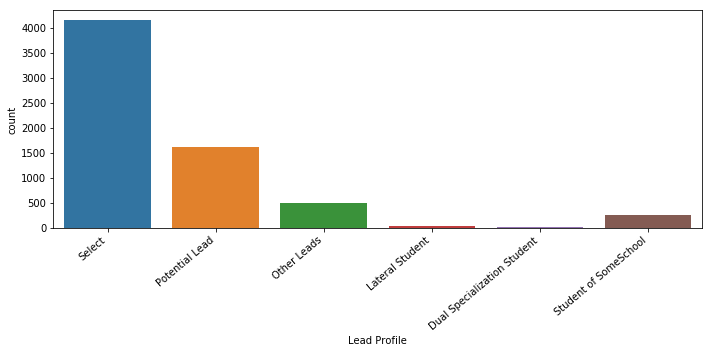

In [12]:
# Plot Lead Profile
fig = plt.figure(figsize = (10,5))
ax = sns.countplot(x="Lead Profile", data=edu_online)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

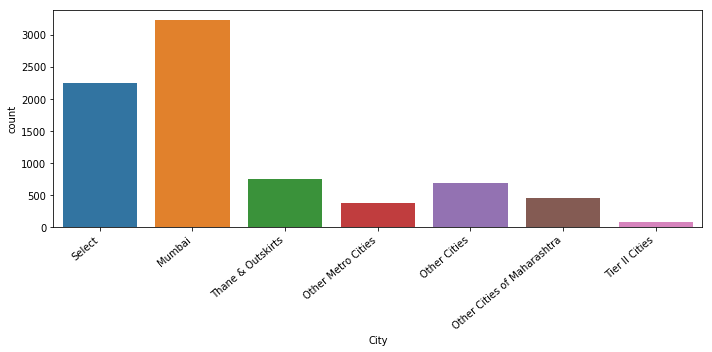

In [13]:
fig = plt.figure(figsize = (10,5))
ax = sns.countplot(x="City", data=edu_online)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

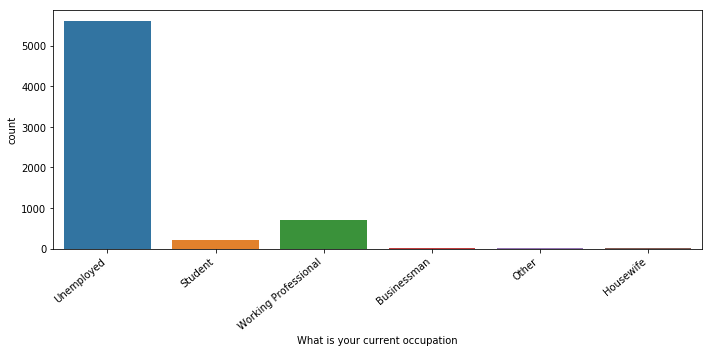

In [14]:
#sns.catplot(x = "What is your current occupation", data = edu_online, kind = "count",aspect = 2,legend=True)
fig = plt.figure(figsize = (10,5))
ax = sns.countplot(x="What is your current occupation", data=edu_online)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

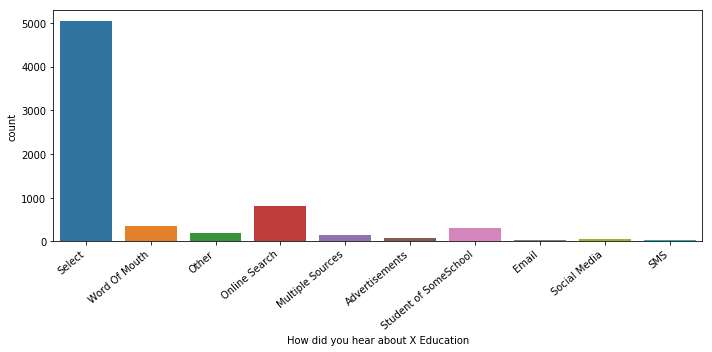

In [15]:
#sns.catplot(x = "How did you hear about X Education", data = edu_online, kind = "count",aspect = 2,legend=True)
fig = plt.figure(figsize = (10,5))
ax = sns.countplot(x="How did you hear about X Education", data=edu_online)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

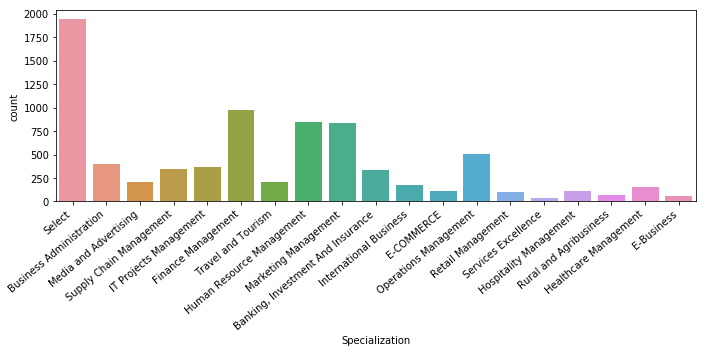

In [16]:
fig = plt.figure(figsize = (10,5))
ax = sns.countplot(x="Specialization", data=edu_online)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

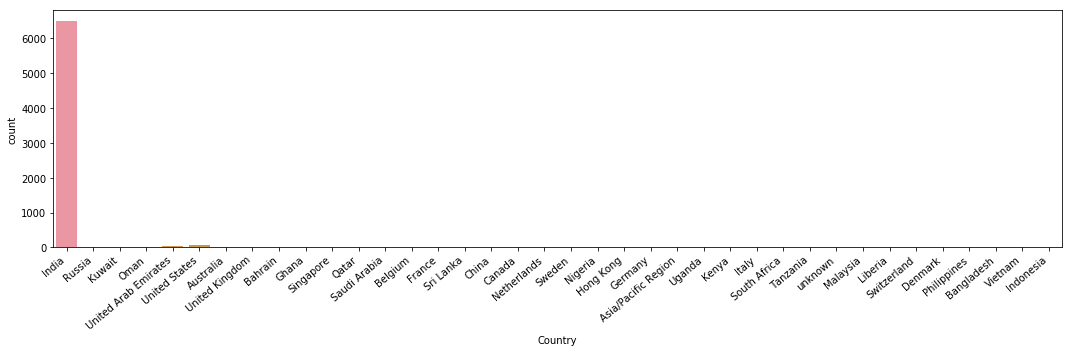

In [17]:
fig = plt.figure(figsize = (15,5))
ax = sns.countplot(x="Country", data=edu_online)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Based on the above graphs, it is evident that for few of the variables such as Lead Profile,How did you hear, City etc, the majority of value is "Select" which is nothing bu equivalemt to Null as it does not provide any business value

In [18]:
#Replace Select with Nan in entire data frame...
edu_online.replace('Select', np.nan, inplace=True)

In [19]:
# Checking the percentage of missing values
round(100*(edu_online.isnull().sum()/len(edu_online.index)), 2) 

Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Specialization                              36.58
How did you hear about X Education          78.46
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


In [20]:
#Drop few columns based on Null percentage
edu_online = edu_online.drop(['How did you hear about X Education','Lead Profile','City'], axis=1)

#Now, Country, Specialization, and Occupation have high percentage of Null, but these variables seems to be having some business value, so first try to impute the values in these varibales

### Handle Country

In [21]:
print(edu_online['Country'].describe())
print (edu_online.groupby('Country')['Lead Number'].nunique())

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object
Country
Asia/Pacific Region        2
Australia                 13
Bahrain                    7
Bangladesh                 2
Belgium                    2
Canada                     4
China                      2
Denmark                    1
France                     6
Germany                    4
Ghana                      2
Hong Kong                  7
India                   6492
Indonesia                  1
Italy                      2
Kenya                      1
Kuwait                     4
Liberia                    1
Malaysia                   1
Netherlands                2
Nigeria                    4
Oman                       6
Philippines                2
Qatar                     10
Russia                     1
Saudi Arabia              21
Singapore                 24
South Africa               4
Sri Lanka                  1
Sweden                     3
Switzerland                1


In [22]:
# Out of 6779 not null records, 6492 is Mumbai and around 2000 were Select which we converted to NUll, So country doesnt add any
#Drop country
edu_online = edu_online.drop(['Country'], axis=1)

### Handle Specialization

In [23]:
print(edu_online['Specialization'].describe())
print (edu_online.groupby('Specialization')['Lead Number'].nunique())

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object
Specialization
Banking, Investment And Insurance    338
Business Administration              403
E-Business                            57
E-COMMERCE                           112
Finance Management                   976
Healthcare Management                159
Hospitality Management               114
Human Resource Management            848
IT Projects Management               366
International Business               178
Marketing Management                 838
Media and Advertising                203
Operations Management                503
Retail Management                    100
Rural and Agribusiness                73
Services Excellence                   40
Supply Chain Management              349
Travel and Tourism                   203
Name: Lead Number, dtype: int64


#### There does not seem to be any specialization whose frequency stands out, i.e. values are spread pretty evenly,so we can not chose any existing value to replace Null(Select). We however can replace Null with Other.

In [24]:
edu_online['Specialization'].fillna(value='Others', inplace=True)
print(edu_online['Specialization'].unique())

['Others' 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']


### Handle Occupation

In [25]:
print(edu_online['What is your current occupation'].describe())
print (edu_online.groupby('What is your current occupation')['Lead Number'].nunique())

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object
What is your current occupation
Businessman                8
Housewife                 10
Other                     16
Student                  210
Unemployed              5600
Working Professional     706
Name: Lead Number, dtype: int64


In [26]:
#Out of Not Null values, 90% of records have Unemployed as the value, so imputing this in the data frame
edu_online['What is your current occupation'].fillna(value='Unemployed', inplace=True)
print(edu_online['What is your current occupation'].unique())

['Unemployed' 'Student' 'Working Professional' 'Businessman' 'Other'
 'Housewife']


In [27]:
# Checking the percentage of missing values
round(100*(edu_online.isnull().sum()/len(edu_online.index)), 2) 

Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

### Now, Lead Source, Total Visit,Page Views Per Visit, Last Activity have small percentage of Null, so we can drop such rows where these values are Null as we would not loose much information...

#### Lets start with Page Views Per Visit as it has highest % Null among these four variables.

In [28]:
print(edu_online['Lead Source'].describe())
print(edu_online['TotalVisits'].describe())
print(edu_online['Page Views Per Visit'].describe())
print(edu_online['Last Activity'].describe())

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object
count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64
count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64
count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object


In [29]:
edu_online = edu_online.dropna(axis=0, subset=['Page Views Per Visit'])

In [30]:
# Checking the percentage of missing values
round(100*(edu_online.isnull().sum()/len(edu_online.index)), 2) 

Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.32
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [31]:
#Now Drop Lead Source Nulls...
edu_online = edu_online.dropna(axis=0, subset=['Lead Source'])

In [32]:
# Checking the percentage of missing values
round(100*(edu_online.isnull().sum()/len(edu_online.index)), 2) 

Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

### Perfect...this took care of all Nulls

In [33]:
edu_online.shape

(9074, 25)

In [34]:
edu_online.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


### TotalVisits, Total time spent on Website, and Page Views per Visit are continous numerical variables. But rest all Categorical Values. Lets check the unique values in each of these colums to get some insights.

In [35]:
### Now check the unique values in other columns specifically containing Yes and Now Values...

In [36]:
# Checking the unique values of the columns with categorical values 
print("Lead Origin")
print(edu_online['Lead Origin'].unique())
print("Lead Source")
print(edu_online['Lead Source'].unique())
print('\n')
print("Last Activity")
print(edu_online['Last Activity'].unique())
print('\n')
print('Do Not Email')
print(edu_online['Do Not Email'].unique())
print('\n')
print('Do Not Call')
print(edu_online['Do Not Call'].unique())
print('\n')
print("Receive More Updates About Our Courses")
print(edu_online['Receive More Updates About Our Courses'].unique())
print('\n')
print("Through Recommendations")
print(edu_online['Through Recommendations'].unique())
print('\n')
print("Digital Advertisement")
print(edu_online['Digital Advertisement'].unique())
print('\n')
print("Newspaper")
print(edu_online['Newspaper'].unique())
print('\n')
print("X Education Forums")
print(edu_online['X Education Forums'].unique())
print('\n')
print("Newspaper Article")
print(edu_online['Newspaper Article'].unique())
print('\n')
print("Magazine")
print(edu_online['Magazine'].unique())
print('\n')
print("Search")
print(edu_online['Search'].unique())
print('\n')
print("Get updates on DM Content ")
print(edu_online['Get updates on DM Content'].unique())
print('\n')
print("I agree to pay the amount through cheque")
print(edu_online['I agree to pay the amount through cheque'].unique())
print('\n')
print("A free copy of Mastering The Interview")
print(edu_online['A free copy of Mastering The Interview'].unique())
print('\n')
print("Last Notable Activity")
print(edu_online['Last Notable Activity'].unique())
print('\n')

Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']


Last Activity
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' 'SMS Sent'
 'Visited Booth in Tradeshow' 'Approached upfront'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']


Do Not Email
['No' 'Yes']


Do Not Call
['No' 'Yes']


Receive More Updates About Our Courses
['No']


Through Recommendations
['No' 'Yes']


Digital Advertisement
['No' 'Yes']


Newspaper
['No' 'Yes']


X Education Forums
['No' 'Yes']


Ne

In [37]:
## Fix the typological errors:
edu_online['Lead Source'].replace(['google'],['Google'], inplace=True)
edu_online['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

#### Can drop below columns as they only contain one categorical value which does not add anything
    1."Receive More Updates About Our Courses" only contains No
    2."Magazine" only contains No
    3."Get updates on DM Content " only contains No
    4."I agree to pay the amount through cheque" only contains No

In [38]:
edu_online = edu_online.drop(['Receive More Updates About Our Courses','Magazine','Get updates on DM Content'
                             ,'I agree to pay the amount through cheque'], axis=1)

In [39]:
edu_online.shape

(9074, 21)

In [40]:
edu_online.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,No,No,No,No,No,No,No,Modified


In [41]:
#Now check for distinct values in some other columns

In [42]:
print (edu_online.groupby('Do Not Email')['Lead Number'].nunique())
print('\n')
print (edu_online.groupby('Do Not Call')['Lead Number'].nunique())
print('\n')
print (edu_online.groupby('Search')['Lead Number'].nunique())
print('\n')
print (edu_online.groupby('Newspaper Article')['Lead Number'].nunique())
print('\n')
print (edu_online.groupby('X Education Forums')['Lead Number'].nunique())
print('\n')
print (edu_online.groupby('Newspaper')['Lead Number'].nunique())
print('\n')
print (edu_online.groupby('Digital Advertisement')['Lead Number'].nunique())
print('\n')
print (edu_online.groupby('Through Recommendations')['Lead Number'].nunique())
print('\n')
print (edu_online.groupby('Update me on Supply Chain Content')['Lead Number'].nunique())
print('\n')
print (edu_online.groupby('A free copy of Mastering The Interview')['Lead Number'].nunique())

Do Not Email
No     8358
Yes     716
Name: Lead Number, dtype: int64


Do Not Call
No     9072
Yes       2
Name: Lead Number, dtype: int64


Search
No     9060
Yes      14
Name: Lead Number, dtype: int64


Newspaper Article
No     9072
Yes       2
Name: Lead Number, dtype: int64


X Education Forums
No     9073
Yes       1
Name: Lead Number, dtype: int64


Newspaper
No     9073
Yes       1
Name: Lead Number, dtype: int64


Digital Advertisement
No     9070
Yes       4
Name: Lead Number, dtype: int64


Through Recommendations
No     9067
Yes       7
Name: Lead Number, dtype: int64


Update me on Supply Chain Content
No    9074
Name: Lead Number, dtype: int64


A free copy of Mastering The Interview
No     6186
Yes    2888
Name: Lead Number, dtype: int64


In [43]:
# As per above output, there are some varibales which do not have much variations, so dropping those columns
#Do Not Call
#Search
#Newspaper Article
#Digital Advertisement
#Through Recommendations
#X Education Forums
#Newspaper
#Update me on Supply Chain Content

In [44]:
edu_online = edu_online.drop(['Do Not Call','Newspaper Article','Digital Advertisement','Through Recommendations'
                             ,'X Education Forums','Newspaper','Update me on Supply Chain Content','Search'], axis=1)

In [45]:
edu_online.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Modified


#### Converting categorical variable with binary values (Yes/No) to 0/1

In [46]:
# List of variables to map

edu_cat_vars =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable where there are only two possible vaules i.e. Yes or No
edu_online[edu_cat_vars] = edu_online[edu_cat_vars].apply(binary_map)


In [47]:
edu_online.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,Modified


In [48]:
len(edu_online[edu_online['Specialization'] == 'Others'])

3282

### Well, we did some hard work in Specialization, but it seems there are more than 35% of rows which were Null/Select initially. Imputing values for these many Null values might lead to a different result all together. So, I am dropping this column now from the data frame.

In [49]:
edu_online = edu_online.drop(['Specialization'], axis=1)

#### For categorical variables with multiple levels, creating dummy features

In [50]:
print(edu_online.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null int64
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
What is your current occupation           9074 non-null object
A free copy of Mastering The Interview    9074 non-null int64
Last Notable Activity                     9074 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 921.6+ KB
None


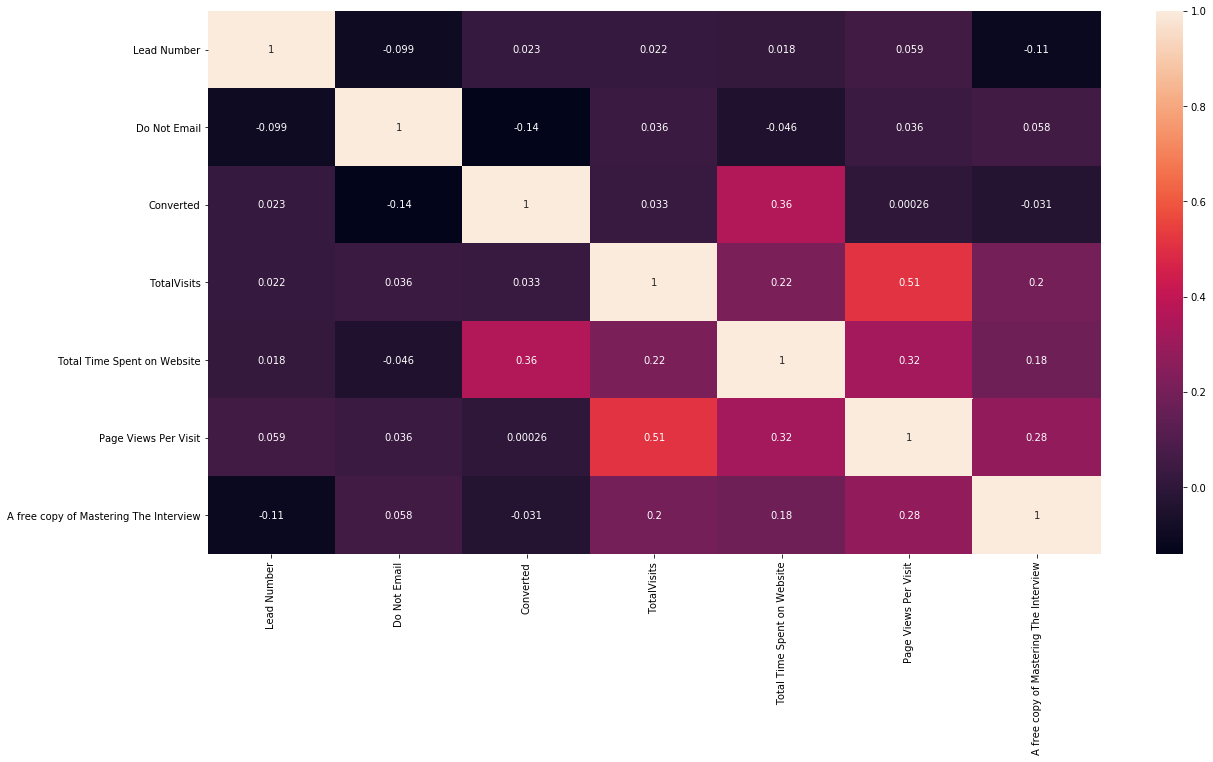

In [51]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(edu_online.corr(),annot = True)
plt.show()

In [52]:
# Getting the dummy variables for the features

print("Lead_Origin")
Lead_Origin = pd.get_dummies(edu_online['Lead Origin'], prefix='Lead_Origin')
print(Lead_Origin.head())
print('\n')

print("Lead_Source")
Lead_Source = pd.get_dummies(edu_online['Lead Source'], prefix='Lead_Source')
print(Lead_Source.head())
print('\n')

print("Last_Activity")
Last_Activity = pd.get_dummies(edu_online['Last Activity'],  prefix='Last_Activity')
print(Last_Activity.head())
print('\n')

print("What is your current occupation")
Occupation = pd.get_dummies(edu_online['What is your current occupation'],  prefix='Occ')
print(Occupation.head())
print('\n')

print("Last_Notable_Activity")
Last_Notable_Activity = pd.get_dummies(edu_online['Last Notable Activity'], prefix='Last_Notable_Activity')
print(Last_Notable_Activity.head())
print('\n')


Lead_Origin
   Lead_Origin_API  Lead_Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  
0                          0                        0  
1                          0                        0  
2                          0                        0  
3                          0                        0  
4                          0                        0  


Lead_Source
   Lead_Source_Click2call  Lead_Source_Direct Traffic  Lead_Source_Facebook  \
0                       0                           0                     0   
1                       0                           0                     0   
2                       0                     

In [53]:
# We have created dummies for the below variables, so we can drop them
edu_online = edu_online.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity'], axis=1)

In [54]:
edu_online.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,660737,0,0,0.0,0,0.0,0
1,660728,0,0,5.0,674,2.5,0
2,660727,0,1,2.0,1532,2.0,1
3,660719,0,0,1.0,305,1.0,0
4,660681,0,1,2.0,1428,1.0,0


In [55]:
# Concatenate all the dataframes of the dummy variables

edu_online = pd.concat([edu_online,Lead_Origin,Lead_Source,Last_Activity,Occupation,Last_Notable_Activity], axis=1)
edu_online.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Occ_Businessman,Occ_Housewife,Occ_Other,Occ_Student,Occ_Unemployed,Occ_Working Professional,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [56]:
edu_online.shape

(9074, 70)

#### Checking for Outliers

In [57]:
# Checking for outliers in the continuous variables
num_edu = edu_online[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_edu.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,9074.000000,9074.000000,9074.000000
mean,3.456028,2.370151,482.887481
std,4.858802,2.160871,545.256560
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,11.000000
50%,3.000000,2.000000,246.000000
75%,5.000000,3.200000,922.750000
90%,7.000000,5.000000,1373.000000
95%,10.000000,6.000000,1557.000000
99%,17.000000,9.000000,1839.000000


##### Lets do outlier for TotalVisits and Page Views Per Visit. We dont ned to Total time spendt as values are gradually increasing

In [58]:
edu_online['TotalVisits']=edu_online['TotalVisits'].apply(lambda x: 10 if x > 10 else x)
edu_online['Page Views Per Visit']=edu_online['Page Views Per Visit'].apply(lambda x: 8 if x > 8 else x)

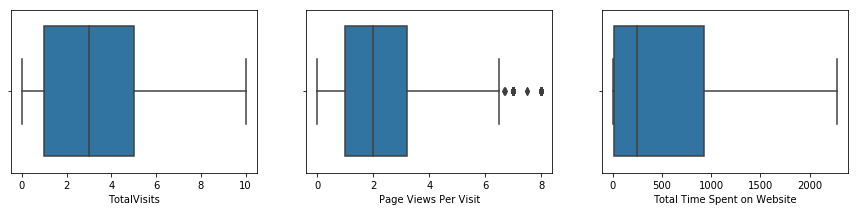

In [59]:
#7 Check for Outliers in Numerical Values
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.boxplot(x = 'TotalVisits', data = edu_online)
plt.subplot(1,3,2)
sns.boxplot(x = 'Page Views Per Visit',  data = edu_online)
plt.subplot(1,3,3)
sns.boxplot(x = 'Total Time Spent on Website',data = edu_online)

### Test-Train Split

In [60]:
# Putting feature variable to X
X = edu_online.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Occ_Businessman,Occ_Housewife,Occ_Other,Occ_Student,Occ_Unemployed,Occ_Working Professional,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [61]:
# Putting response variable to y
y = edu_online['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [63]:

X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Occ_Businessman,Occ_Housewife,Occ_Other,Occ_Student,Occ_Unemployed,Occ_Working Professional,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.174341,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.174341,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.201012,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.174341,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.082327,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [64]:
### Checking the Churn Rate
lead_conv = (sum(edu_online['Converted'])/len(edu_online['Converted'].index))*100
lead_conv

37.85541106458012

# Model Building

In [65]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6290
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        09:57:56   Pearson chi2:                 7.29e+18
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               1.264e+14   1.37e+07   9.24e+06      0.000    1.26e+14    1.26e+14
Do Not Email                                       -5.742e+14   4.42e+06   -1.3e+08      0.000   -5.74e+14   -5.74e+14
TotalVisits                                         5.343e+13   1.45e+06   3.67e+07      0.000    5.34e+13    5.34e+13
Total Time Spent on Website                         8.134e+14   9.78e+05   8.32e+08      0.000    8.13e+14    8.13e+14
Page Views Per Visit                               -4.168e+13   1.51e+06  -2.76e+07      0.000   -4.17e+13   -4.17e+13
A free copy of Mastering The Interview              1.205e+14   2.62e+06   4.61e+07      0.000    1.21e+14    1.21e+14
Lead_Origin_API                                    -1.152e+15   1.92e+07     -6e+07      0.000   -1.15e+15   -1.15e+15
Lead_Origin_Landing Page Submission                -1.206e+15   1.92e+07  -6.28e+07      0.000   -1.21e+15   -1.21e+15
Lead_Origin_Lead Add Form                           -1.63e+15   3.91e+07  -4.17e+07      0.000   -1.63e+15   -1.63e+15
Lead_Origin_Lead Import                             4.115e+15   5.51e+07   7.47e+07      0.000    4.12e+15    4.12e+15
Lead_Source_Click2call                              4.125e+15   5.37e+07   7.68e+07      0.000    4.12e+15    4.12e+15
Lead_Source_Direct Traffic                          1.251e+15    1.5e+07   8.35e+07      0.000    1.25e+15    1.25e+15
Lead_Source_Facebook                               -2.332e+15    6.5e+07  -3.59e+07      0.000   -2.33e+15   -2.33e+15
Lead_Source_Google                                  1.587e+15   1.49e+07   1.06e+08      0.000    1.59e+15    1.59e+15
Lead_Source_Live Chat                               5.464e+15   5.97e+07   9.16e+07      0.000    5.46e+15    5.46e+15
Lead_Source_NC_EDM                                  3.187e+15   6.54e+07   4.87e+07      0.000    3.19e+15    3.19e+15
Lead_Source_Olark Chat                              1.435e+15    1.5e+07   9.57e+07      0.000    1.43e+15    1.43e+15
Lead_Source_Organic Search                          1.443e+15   1.51e+07   9.58e+07      0.000    1.44e+15    1.44e+15
Lead_Source_Pay per Click Ads                      -5.142e+15   6.53e+07  -7.87e+07      0.000   -5.14e+15   -5.14e+15
Lead_Source_Press_Release                          -3.614e+15   6.57e+07   -5.5e+07      0.000   -3.61e+15   -3.61e+15
Lead_Source_Reference                               3.851e+15   3.93e+07    9.8e+07      0.000    3.85e+15    3.85e+15
Lead_Source_Referral Sites                          1.299e+15   1.64e+07    7.9e+07      0.000     1.3e+15     1.3e+15
Lead_Source_Social Media                            7.183e+14   4.74e+07   1.51e+07      0.000    7.18e+14    7.18e+14
Lead_Source_WeLearn                                   -7.0985   2.95

### Feature Selection Using RFE

In [66]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [67]:
rfe.support_

array([ True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True,  True, False])

In [68]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 26),
 ('A free copy of Mastering The Interview', False, 53),
 ('Lead_Origin_API', False, 4),
 ('Lead_Origin_Landing Page Submission', False, 3),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 16),
 ('Lead_Source_Click2call', False, 41),
 ('Lead_Source_Direct Traffic', False, 27),
 ('Lead_Source_Facebook', False, 39),
 ('Lead_Source_Google', False, 31),
 ('Lead_Source_Live Chat', False, 37),
 ('Lead_Source_NC_EDM', False, 15),
 ('Lead_Source_Olark Chat', False, 5),
 ('Lead_Source_Organic Search', False, 28),
 ('Lead_Source_Pay per Click Ads', False, 42),
 ('Lead_Source_Press_Release', False, 38),
 ('Lead_Source_Reference', False, 6),
 ('Lead_Source_Referral Sites', False, 20),
 ('Lead_Source_Social Media', False, 11),
 ('Lead_Source_WeLearn', False, 54),
 ('Lead_Source_Welingak Website', True, 1),
 ('Lead_Source_bing', False,

In [69]:
col = X_train.columns[rfe.support_]

In [70]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Import',
       'Lead_Source_Click2call', 'Lead_Source_Direct Traffic',
       'Lead_Source_Facebook', 'Lead_Source_Google', 'Lead_Source_Live Chat',
       'Lead_Source_NC_EDM', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Pay per Click Ads',
       'Lead_Source_Press_Release', 'Lead_Source_Reference',
       'Lead_Source_Referral Sites', 'Lead_Source_Social Media',
       'Lead_Source_WeLearn', 'Lead_Source_bing', 'Lead_Source_blog',
       'Lead_Source_testone', 'Lead_Source_welearnblog_Home',
       'Lead_Source_youtubechannel', 'Last_Activity_Email Link Clicked',
       'Last_Activity_Email Marked Spam', 'Last_Activity_Email Opened',
       'Last_Activity_Email Received',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Pa

#### Assessing the model with StatsModels

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3109.7
Date:                Sun, 03 Mar 2019   Deviance:                       6219.4
Time:                        09:57:57   Pearson chi2:                 6.49e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.9593      0.040    -23.847      0.000      -1.038      -0.880
Do Not Email                                      -1.6783      0.194     -8.654      0.000      -2.058      -1.298
Lead_Origin_Lead Add Form                          2.6193      0.213     12.273      0.000       2.201       3.038
Lead_Source_Welingak Website                       2.0159      0.753      2.679      0.007       0.541       3.491
Last_Activity_Approached upfront                  23.5254   2.16e+04      0.001      0.999   -4.22e+04    4.23e+04
Last_Activity_Converted to Lead                   -1.3107      0.201     -6.512      0.000      -1.705      -0.916
Last_Activity_Email Bounced                       -1.6207      0.610     -2.655      0.008      -2.817      -0.424
Last_Activity_Had a Phone Conversation             1.7093      0.966      1.769      0.077      -0.184       3.603
Last_Activity_Olark Chat Conversation             -1.4326      0.145     -9.902      0.000      -1.716      -1.149
Occ_Housewife                                     22.7950   1.63e+04      0.001      0.999   -3.19e+04    3.19e+04
Occ_Working Professional                           2.8186      0.177     15.902      0.000       2.471       3.166
Last_Notable_Activity_Email Bounced                1.9379      0.770      2.516      0.012       0.428       3.447
Last_Notable_Activity_Had a Phone Conversation     1.4617      1.428      1.023      0.306      -1.338       4.261
Last_Notable_Activity_SMS Sent                     1.5640      0.072     21.705      0.000       1.423       1.705
Last_Notable_Activity_Unreachable                  1.4290      0.436      3.274      0.001       0.574       2.284
Last_Notable_Activity_Unsubscribed                 1.7663      0.468      3.773      0.000       0.849       2.684
==================================================================================================================
"""

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last_Activity_Had a Phone Conversation,3.40
11,Last_Notable_Activity_Had a Phone Conversation,3.40
5,Last_Activity_Email Bounced,2.05
0,Do Not Email,1.93
1,Lead_Origin_Lead Add Form,1.46
2,Lead_Source_Welingak Website,1.33
10,Last_Notable_Activity_Email Bounced,1.27
9,Occ_Working Professional,1.14
12,Last_Notable_Activity_SMS Sent,1.13
14,Last_Notable_Activity_Unsubscribed,1.11


There are a few variables with high VIF and one with high P value. So let's start by dropping that.

In [74]:
col = col.drop('Last_Activity_Approached upfront', 1)
col

Index(['Do Not Email', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Welingak Website', 'Last_Activity_Converted to Lead',
       'Last_Activity_Email Bounced', 'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation', 'Occ_Housewife',
       'Occ_Working Professional', 'Last_Notable_Activity_Email Bounced',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_SMS Sent', 'Last_Notable_Activity_Unreachable',
       'Last_Notable_Activity_Unsubscribed'],
      dtype='object')

In [75]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3116.1
Date:                Sun, 03 Mar 2019   Deviance:                       6232.2
Time:                        09:57:57   Pearson chi2:                 6.49e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.9535      0.040    -23.752      0.000      -1.032      -0.875
Do Not Email                                      -1.6799      0.194     -8.667      0.000      -2.060      -1.300
Lead_Origin_Lead Add Form                          2.6148      0.213     12.254      0.000       2.197       3.033
Lead_Source_Welingak Website                       2.0163      0.753      2.679      0.007       0.541       3.491
Last_Activity_Converted to Lead                   -1.3161      0.201     -6.541      0.000      -1.711      -0.922
Last_Activity_Email Bounced                       -1.6250      0.610     -2.662      0.008      -2.821      -0.429
Last_Activity_Had a Phone Conversation             1.7038      0.966      1.763      0.078      -0.190       3.598
Last_Activity_Olark Chat Conversation             -1.4383      0.145     -9.943      0.000      -1.722      -1.155
Occ_Housewife                                     22.7899   1.63e+04      0.001      0.999   -3.19e+04     3.2e+04
Occ_Working Professional                           2.8148      0.177     15.880      0.000       2.467       3.162
Last_Notable_Activity_Email Bounced                1.9384      0.770      2.517      0.012       0.429       3.448
Last_Notable_Activity_Had a Phone Conversation     1.4615      1.428      1.023      0.306      -1.338       4.261
Last_Notable_Activity_SMS Sent                     1.5584      0.072     21.642      0.000       1.417       1.700
Last_Notable_Activity_Unreachable                  1.4234      0.436      3.261      0.001       0.568       2.279
Last_Notable_Activity_Unsubscribed                 1.7623      0.468      3.766      0.000       0.845       2.680
==================================================================================================================
"""

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last_Activity_Had a Phone Conversation,3.40
10,Last_Notable_Activity_Had a Phone Conversation,3.40
4,Last_Activity_Email Bounced,2.05
0,Do Not Email,1.93
1,Lead_Origin_Lead Add Form,1.46
2,Lead_Source_Welingak Website,1.33
9,Last_Notable_Activity_Email Bounced,1.27
8,Occ_Working Professional,1.14
11,Last_Notable_Activity_SMS Sent,1.13
13,Last_Notable_Activity_Unsubscribed,1.11


In [77]:
col = col.drop('Occ_Housewife', 1)
col

Index(['Do Not Email', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Welingak Website', 'Last_Activity_Converted to Lead',
       'Last_Activity_Email Bounced', 'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation', 'Occ_Working Professional',
       'Last_Notable_Activity_Email Bounced',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_SMS Sent', 'Last_Notable_Activity_Unreachable',
       'Last_Notable_Activity_Unsubscribed'],
      dtype='object')

In [78]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3121.8
Date:                Sun, 03 Mar 2019   Deviance:                       6243.5
Time:                        09:57:57   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.9487      0.040    -23.671      0.000      -1.027      -0.870
Do Not Email                                      -1.6823      0.194     -8.678      0.000      -2.062      -1.302
Lead_Origin_Lead Add Form                          2.6323      0.213     12.355      0.000       2.215       3.050
Lead_Source_Welingak Website                       1.9958      0.752      2.652      0.008       0.521       3.471
Last_Activity_Converted to Lead                   -1.3206      0.201     -6.564      0.000      -1.715      -0.926
Last_Activity_Email Bounced                       -1.6276      0.610     -2.667      0.008      -2.824      -0.431
Last_Activity_Had a Phone Conversation             1.6994      0.966      1.759      0.079      -0.195       3.593
Last_Activity_Olark Chat Conversation             -1.4431      0.145     -9.978      0.000      -1.727      -1.160
Occ_Working Professional                           2.8112      0.177     15.859      0.000       2.464       3.159
Last_Notable_Activity_Email Bounced                1.9391      0.770      2.518      0.012       0.430       3.448
Last_Notable_Activity_Had a Phone Conversation     1.4611      1.428      1.023      0.306      -1.339       4.261
Last_Notable_Activity_SMS Sent                     1.5536      0.072     21.584      0.000       1.412       1.695
Last_Notable_Activity_Unreachable                  1.4185      0.436      3.250      0.001       0.563       2.274
Last_Notable_Activity_Unsubscribed                 1.7601      0.468      3.761      0.000       0.843       2.677
==================================================================================================================
"""

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last_Activity_Had a Phone Conversation,3.40
9,Last_Notable_Activity_Had a Phone Conversation,3.40
4,Last_Activity_Email Bounced,2.05
0,Do Not Email,1.93
1,Lead_Origin_Lead Add Form,1.45
2,Lead_Source_Welingak Website,1.33
8,Last_Notable_Activity_Email Bounced,1.27
7,Occ_Working Professional,1.14
10,Last_Notable_Activity_SMS Sent,1.13
12,Last_Notable_Activity_Unsubscribed,1.11


In [80]:
col = col.drop('Last_Notable_Activity_Had a Phone Conversation', 1)
col

Index(['Do Not Email', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Welingak Website', 'Last_Activity_Converted to Lead',
       'Last_Activity_Email Bounced', 'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation', 'Occ_Working Professional',
       'Last_Notable_Activity_Email Bounced', 'Last_Notable_Activity_SMS Sent',
       'Last_Notable_Activity_Unreachable',
       'Last_Notable_Activity_Unsubscribed'],
      dtype='object')

In [81]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3122.3
Date:                Sun, 03 Mar 2019   Deviance:                       6244.6
Time:                        09:57:57   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9486      0.040    -23.670      0.000      -1.027      -0.870
Do Not Email                              -1.6893      0.194     -8.710      0.000      -2.069      -1.309
Lead_Origin_Lead Add Form                  2.6326      0.213     12.355      0.000       2.215       3.050
Lead_Source_Welingak Website               1.9966      0.753      2.653      0.008       0.522       3.472
Last_Activity_Converted to Lead           -1.3207      0.201     -6.565      0.000      -1.715      -0.926
Last_Activity_Email Bounced               -1.6219      0.610     -2.657      0.008      -2.818      -0.425
Last_Activity_Had a Phone Conversation     2.5035      0.662      3.779      0.000       1.205       3.802
Last_Activity_Olark Chat Conversation     -1.4432      0.145     -9.978      0.000      -1.727      -1.160
Occ_Working Professional                   2.8117      0.177     15.862      0.000       2.464       3.159
Last_Notable_Activity_Email Bounced        1.9402      0.770      2.520      0.012       0.431       3.449
Last_Notable_Activity_SMS Sent             1.5539      0.072     21.587      0.000       1.413       1.695
Last_Notable_Activity_Unreachable          1.4187      0.436      3.250      0.001       0.563       2.274
Last_Notable_Activity_Unsubscribed         1.7670      0.468      3.775      0.000       0.850       2.684
==========================================================================================================
"""

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last_Activity_Email Bounced,2.05
0,Do Not Email,1.93
1,Lead_Origin_Lead Add Form,1.45
2,Lead_Source_Welingak Website,1.33
8,Last_Notable_Activity_Email Bounced,1.27
7,Occ_Working Professional,1.14
9,Last_Notable_Activity_SMS Sent,1.13
11,Last_Notable_Activity_Unsubscribed,1.11
3,Last_Activity_Converted to Lead,1.00
5,Last_Activity_Had a Phone Conversation,1.00


##### All the VIF and p values are in range, so above is the final model. Below three varaibles have highesh coefficient
    Working Professional
    Lead Origin - Lead Add Form
    Last Activity had a Phone conversation

# Evaluate the Finalized Model on Train Data Set

In [83]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [84]:
y_train_pred[:10]

array([0.27916713, 0.62061367, 0.27916713, 0.64686974, 0.27916713,
       0.64686974, 0.27916713, 0.64686974, 0.27916713, 0.27916713])

In [85]:
y_train_pred_final = pd.DataFrame({'Lead_Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Lead_Conv,Conv_Prob,Lead Number
0,0,0.279167,3009
1,0,0.620614,1012
2,0,0.279167,9226
3,1,0.646870,4750
4,1,0.279167,7987


In [86]:
# Creating new column 'predicted' with 1 if conv_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Lead_Conv,Conv_Prob,Lead Number,predicted
0,0,0.279167,3009,0
1,0,0.620614,1012,1
2,0,0.279167,9226,0
3,1,0.646870,4750,1
4,1,0.279167,7987,0


In [87]:
y_train_pred_final.shape

(6351, 4)

## Evaluate model based on all Metrics beyond Accuracy

In [88]:
print("Overall Accuracy :", metrics.accuracy_score(y_train_pred_final.Lead_Conv, y_train_pred_final.predicted))
confusion_opt = metrics.confusion_matrix(y_train_pred_final.Lead_Conv, y_train_pred_final.predicted )
TP = confusion_opt[1,1] # true positive 
TN = confusion_opt[0,0] # true negatives
FP = confusion_opt[0,1] # false positives
FN = confusion_opt[1,0] # false negatives

print("Sensitivity :" ,TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive Rate :", FP/ float(TN+FP)) # predicting lead when there is no lead
print("Positive Predicted Value :",TP / float(TP+FP))
print("Negative Predicted Value :", TN / float(TN+ FN))
print("Precision Score :",precision_score(y_train_pred_final.Lead_Conv, y_train_pred_final.predicted))
print("Recall Score :",recall_score(y_train_pred_final.Lead_Conv, y_train_pred_final.predicted))

Overall Accuracy : 0.7745236970555818
Sensitivity : 0.607113654946852
Specificity : 0.8793854033290653
False Positive Rate : 0.1206145966709347
Positive Predicted Value : 0.75920245398773
Negative Predicted Value : 0.7813424345847554
Precision Score : 0.75920245398773
Recall Score : 0.607113654946852


### Plotting the ROC Curve

In [89]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead_Conv, y_train_pred_final.Conv_Prob, drop_intermediate = False )

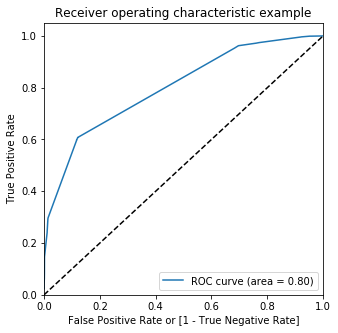

In [91]:
draw_roc(y_train_pred_final.Lead_Conv, y_train_pred_final.Conv_Prob)

### We chose 0.5 as random probablity as the cut off point, but lets try to identify the Optimal Cut off

In [92]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead_Conv,Conv_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.279167,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.620614,1012,1,1,1,1,1,1,1,1,0,0,0
2,0,0.279167,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.646870,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.279167,7987,0,1,1,1,0,0,0,0,0,0,0


In [93]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead_Conv, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.556763  0.962388  0.302689
0.2   0.2  0.556920  0.962388  0.302945
0.3   0.3  0.774681  0.607931  0.879129
0.4   0.4  0.774681  0.607931  0.879129
0.5   0.5  0.774524  0.607114  0.879385
0.6   0.6  0.774366  0.605887  0.879898
0.7   0.7  0.720674  0.298038  0.985403
0.8   0.8  0.720674  0.298038  0.985403
0.9   0.9  0.680050  0.176206  0.995647


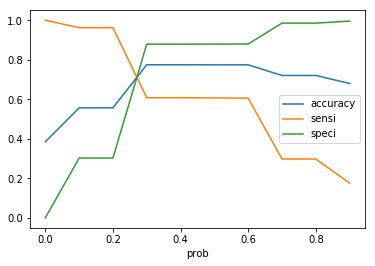

In [94]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [95]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.28 else 0)
y_train_pred_final.head()

,Lead_Conv,Conv_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.279167,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.620614,1012,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.279167,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.646870,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.279167,7987,0,1,1,1,0,0,0,0,0,0,0,0


In [96]:
print("Overall Accuracy :", metrics.accuracy_score(y_train_pred_final.Lead_Conv, y_train_pred_final.final_predicted))
confusion_opt = metrics.confusion_matrix(y_train_pred_final.Lead_Conv, y_train_pred_final.final_predicted )
TP = confusion_opt[1,1] # true positive 
TN = confusion_opt[0,0] # true negatives
FP = confusion_opt[0,1] # false positives
FN = confusion_opt[1,0] # false negatives

print("Sensitivity :" ,TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive Rate :", FP/ float(TN+FP)) # predicting lead when there is no lead
print("Positive Predicted Value :",TP / float(TP+FP))
print("Negative Predicted Value :", TN / float(TN+ FN))
print("Precision Score :",precision_score(y_train_pred_final.Lead_Conv, y_train_pred_final.final_predicted))
print("Recall Score :",recall_score(y_train_pred_final.Lead_Conv, y_train_pred_final.final_predicted))

Overall Accuracy : 0.7729491418674225
Sensitivity : 0.6107931316434996
Specificity : 0.8745198463508322
False Positive Rate : 0.12548015364916773
Positive Predicted Value : 0.7530241935483871
Negative Predicted Value : 0.7820013739409205
Precision Score : 0.7530241935483871
Recall Score : 0.6107931316434996


#### Well the accuracy did not increase much...

### Well, above metric did not change much when we reduced probability from 0.5 to 0.28
    Let's try to reduce it to 0.20
    Then try to increase it to 0.60

In [97]:
y_train_pred_final['predicted_3'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

,Lead_Conv,Conv_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,predicted_3
0,0,0.279167,3009,0,1,1,1,0,0,0,0,0,0,0,0,1
1,0,0.620614,1012,1,1,1,1,1,1,1,1,0,0,0,1,1
2,0,0.279167,9226,0,1,1,1,0,0,0,0,0,0,0,0,1
3,1,0.646870,4750,1,1,1,1,1,1,1,1,0,0,0,1,1
4,1,0.279167,7987,0,1,1,1,0,0,0,0,0,0,0,0,1


In [98]:
print("Overall Accuracy :", metrics.accuracy_score(y_train_pred_final.Lead_Conv, y_train_pred_final.predicted_3))
confusion_opt = metrics.confusion_matrix(y_train_pred_final.Lead_Conv, y_train_pred_final.predicted_3 )
TP = confusion_opt[1,1] # true positive 
TN = confusion_opt[0,0] # true negatives
FP = confusion_opt[0,1] # false positives
FN = confusion_opt[1,0] # false negatives

print("Sensitivity :" ,TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive Rate :", FP/ float(TN+FP)) # predicting lead when there is no lead
print ("Positive Predicted Value :",TP / float(TP+FP))
print ("Negative Predicted Value :", TN / float(TN+ FN))

Overall Accuracy : 0.5569201700519604
Sensitivity : 0.9623875715453802
Specificity : 0.3029449423815621
False Positive Rate : 0.6970550576184379
Positive Predicted Value : 0.4637509850275808
Negative Predicted Value : 0.927843137254902


#### Chosing 0.2 is a bad Idea as it reduced Accuracy as well as Precision........

In [99]:
y_train_pred_final['predicted_3'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.65 else 0)
y_train_pred_final.head()

,Lead_Conv,Conv_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,predicted_3
0,0,0.279167,3009,0,1,1,1,0,0,0,0,0,0,0,0,0
1,0,0.620614,1012,1,1,1,1,1,1,1,1,0,0,0,1,0
2,0,0.279167,9226,0,1,1,1,0,0,0,0,0,0,0,0,0
3,1,0.646870,4750,1,1,1,1,1,1,1,1,0,0,0,1,0
4,1,0.279167,7987,0,1,1,1,0,0,0,0,0,0,0,0,0


In [100]:
print("Overall Accuracy :", metrics.accuracy_score(y_train_pred_final.Lead_Conv, y_train_pred_final.predicted_3))
confusion_opt = metrics.confusion_matrix(y_train_pred_final.Lead_Conv, y_train_pred_final.predicted_3 )
TP = confusion_opt[1,1] # true positive 
TN = confusion_opt[0,0] # true negatives
FP = confusion_opt[0,1] # false positives
FN = confusion_opt[1,0] # false negatives

print("Sensitivity :" ,TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive Rate :", FP/ float(TN+FP)) # predicting lead when there is no lead
print ("Positive Predicted Value :",TP / float(TP+FP))
print ("Negative Predicted Value :", TN / float(TN+ FN))
print("Precision Score :",precision_score(y_train_pred_final.Lead_Conv, y_train_pred_final.predicted_3))

Overall Accuracy : 0.7206739096205322
Sensitivity : 0.2980376124284546
Specificity : 0.9854033290653009
False Positive Rate : 0.014596670934699104
Positive Predicted Value : 0.9274809160305344
Negative Predicted Value : 0.6914645103324348
Precision Score : 0.9274809160305344


In [101]:
y_train_pred_final['Lead_Score']=y_train_pred_final.Conv_Prob*100
y_train_pred_final.head()

,Lead_Conv,Conv_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,predicted_3,Lead_Score
0,0,0.279167,3009,0,1,1,1,0,0,0,0,0,0,0,0,0,27.916713
1,0,0.620614,1012,1,1,1,1,1,1,1,1,0,0,0,1,0,62.061367
2,0,0.279167,9226,0,1,1,1,0,0,0,0,0,0,0,0,0,27.916713
3,1,0.646870,4750,1,1,1,1,1,1,1,1,0,0,0,1,0,64.686974
4,1,0.279167,7987,0,1,1,1,0,0,0,0,0,0,0,0,0,27.916713


### This model shows that prediction power does not vary much if we keep the probability b/w 0.28 and 0.64. Within this range, Accuracy and Precision remains around 75%
### If we change the predicted probability to 0.65, then Accuracy goes little low, but precision goes to 93%. Which is very good.

### Precision and recall tradeoff

In [102]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead_Conv, y_train_pred_final.Conv_Prob)

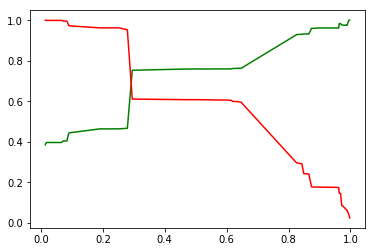

In [103]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the Test set

In [104]:
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [105]:
X_test_pca=X_test # creating a Test DF for PCA....

In [106]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead_Origin_Lead Add Form,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Occ_Working Professional,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
3271,0,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,0,0,0,0,0
4216,0,1,0,0,0,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
X_test_sm = sm.add_constant(X_test)

In [108]:
y_test_pred = res.predict(X_test_sm)

In [109]:
y_test_pred[:10]

3271    0.279167
1490    0.865663
7936    0.279167
4216    0.843438
3830    0.279167
1800    0.865663
6507    0.646870
4821    0.279167
4223    0.962237
4714    0.279167
dtype: float64

In [110]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.279167
1490,0.865663
7936,0.279167
4216,0.843438
3830,0.279167


In [111]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [112]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [113]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [114]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [115]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.279167
1,1,1490,0.865663
2,0,7936,0.279167
3,1,4216,0.843438
4,0,3830,0.279167


In [116]:
y_pred_final.shape

(2723, 3)

In [117]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [118]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Conv_Prob'], axis=1)

In [119]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Conv_Prob
0,3271,0,0.279167
1,1490,1,0.865663
2,7936,0,0.279167
3,4216,1,0.843438
4,3830,0,0.279167


In [120]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [121]:
y_pred_final.head()

,Lead Number,Converted,Conv_Prob,final_predicted
0,3271,0,0.279167,0
1,1490,1,0.865663,1
2,7936,0,0.279167,0
3,4216,1,0.843438,1
4,3830,0,0.279167,0


In [122]:
print("Overall Accuracy :", metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
TP = confusion_opt[1,1] # true positive 
TN = confusion_opt[0,0] # true negatives
FP = confusion_opt[0,1] # false positives
FN = confusion_opt[1,0] # false negatives

print("Sensitivity :" ,TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive Rate :", FP/ float(TN+FP)) # predicting lead when there is no lead
print("Positive Predicted Value :",TP / float(TP+FP))
print("Negative Predicted Value :", TN / float(TN+ FN))
print("Precision Score :",precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

Overall Accuracy : 0.7675358060962174
Sensitivity : 0.2980376124284546
Specificity : 0.9854033290653009
False Positive Rate : 0.014596670934699104
Positive Predicted Value : 0.9274809160305344
Negative Predicted Value : 0.6914645103324348
Precision Score : 0.729381443298969


In [123]:
y_pred_final['predicted_3'] = y_pred_final.Converted.map( lambda x: 1 if x > 0.65 else 0)
print("Overall Accuracy :", metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted_3))
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted_3 )
TP = confusion_opt[1,1] # true positive 
TN = confusion_opt[0,0] # true negatives
FP = confusion_opt[0,1] # false positives
FN = confusion_opt[1,0] # false negatives

print("Sensitivity :" ,TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive Rate :", FP/ float(TN+FP)) # predicting lead when there is no lead
print("Positive Predicted Value :",TP / float(TP+FP))
print("Negative Predicted Value :", TN / float(TN+ FN))
print("Precision Score :",precision_score(y_pred_final.Converted, y_pred_final.predicted_3))

Overall Accuracy : 1.0
Sensitivity : 0.2980376124284546
Specificity : 0.9854033290653009
False Positive Rate : 0.014596670934699104
Positive Predicted Value : 0.9274809160305344
Negative Predicted Value : 0.6914645103324348
Precision Score : 1.0


In [124]:
y_pred_final['Lead_Score']=y_pred_final.Conv_Prob*100
y_pred_final.head()

,Lead Number,Converted,Conv_Prob,final_predicted,predicted_3,Lead_Score
0,3271,0,0.279167,0,0,27.916713
1,1490,1,0.865663,1,1,86.566261
2,7936,0,0.279167,0,0,27.916713
3,4216,1,0.843438,1,1,84.343849
4,3830,0,0.279167,0,0,27.916713


### Result is almost same as it was on the train data set, so model is Stable and can be finalzied.....

# Let's try to prepare another model using PCA

In [125]:
X_train.shape

(6351, 68)

In [126]:
X_test_pca.shape

(2723, 68)

In [127]:
y_train.shape

(6351,)

In [128]:
y_test.shape

(2723,)

In [129]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [130]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [131]:
pca.components_

array([[ 2.59561855e-03,  5.85905731e-01,  4.02581294e-01, ...,
         8.38960882e-04,  7.36819235e-04,  5.17890242e-05],
       [-1.39536245e-02, -2.89878312e-01,  8.61483740e-01, ...,
        -1.00690804e-03,  4.30802575e-04, -2.24683465e-04],
       [-7.45977133e-02,  9.65556647e-03,  2.34060099e-01, ...,
        -6.94665837e-04, -1.05886497e-03, -1.85480819e-05],
       ...,
       [ 0.00000000e+00,  1.70002901e-16, -9.32999954e-18, ...,
         6.49364382e-04,  6.49364382e-04,  6.49364382e-04],
       [-0.00000000e+00,  7.16507264e-18, -1.73272141e-18, ...,
         7.80749876e-11,  7.80747992e-11,  7.80748711e-11],
       [-0.00000000e+00, -4.91628717e-18, -1.94280941e-19, ...,
         6.02593010e-11,  6.02591101e-11,  6.02592756e-11]])

In [132]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.002596,-0.013954,Do Not Email
1,0.585906,-0.289878,TotalVisits
2,0.402581,0.861484,Total Time Spent on Website
3,0.592718,-0.291737,Page Views Per Visit
4,0.123572,-0.020855,A free copy of Mastering The Interview


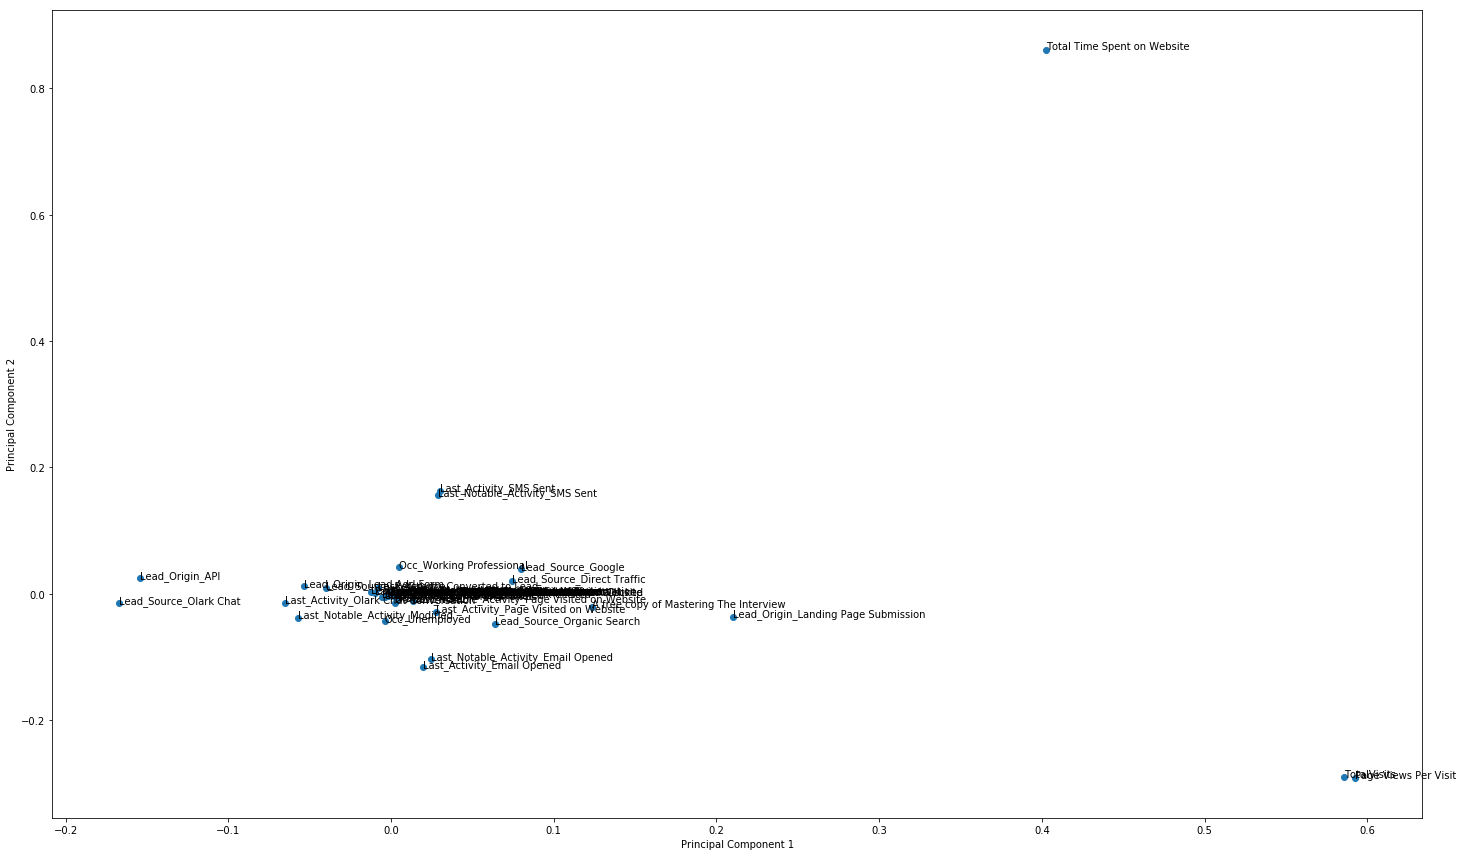

In [133]:
%matplotlib inline
fig = plt.figure(figsize = (20,12))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [134]:
pca.explained_variance_ratio_

array([3.65018837e-01, 1.26291164e-01, 9.26369854e-02, 8.61759365e-02,
       6.32304703e-02, 4.54421755e-02, 3.61826088e-02, 2.81073406e-02,
       2.11937895e-02, 1.76517231e-02, 1.70623367e-02, 1.47591890e-02,
       1.35177111e-02, 1.16820898e-02, 1.02230498e-02, 8.24014609e-03,
       5.97402715e-03, 4.94534391e-03, 4.83331022e-03, 3.57114103e-03,
       3.17205410e-03, 3.02600012e-03, 2.53675615e-03, 2.42947090e-03,
       2.22075500e-03, 1.94951059e-03, 1.45498987e-03, 1.43096663e-03,
       1.01776587e-03, 7.33454361e-04, 7.25890896e-04, 3.98450688e-04,
       3.82574168e-04, 2.04648697e-04, 1.80115223e-04, 1.58066116e-04,
       1.40741963e-04, 1.36804691e-04, 1.21084677e-04, 1.07364346e-04,
       1.06872507e-04, 7.00468231e-05, 6.20215213e-05, 6.05315992e-05,
       5.82154148e-05, 5.29389102e-05, 4.02882876e-05, 2.83132845e-05,
       2.64956685e-05, 2.51656629e-05, 2.51625505e-05, 2.51337377e-05,
       2.50623311e-05, 2.49048312e-05, 2.43329463e-05, 2.18986637e-05,
      

#### PC1 and PC2 covers 50% of data variance ; which is not bad

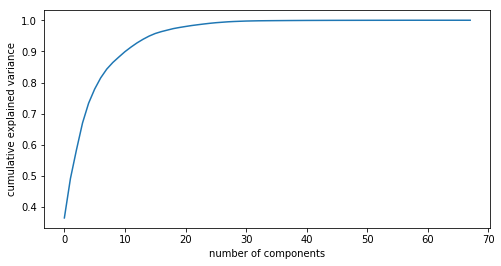

In [135]:
#Making the screeplot - plotting the cumulative variance against the number of components
import numpy as np
%matplotlib inline
fig = plt.figure(figsize = (8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Looks like 12 components are enough to describe 90% of the variance in the dataset
- Let's see how many components unsupervised PCA choses ( should be 12)

# Unsupervised PCA.........

In [136]:
pca_again = PCA(0.90)

In [137]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(6351, 12)

#### Perfect, it chose 12 ;  Great...

In [138]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [139]:
#Predict Probability on train data set
pred_probs_train3 = model_pca2.predict_proba(df_train_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_train, pred_probs_train3))

'0.87'

In [140]:
#Merge train Predicted Probability with y train data frame
y_train_pred_pca = pd.DataFrame({'Converted':y_train.values, 'pca_conv_Prob':pred_probs_train3})
y_train_pred_pca['Lead Number'] = y_train.index
y_train_pred_pca.head()

,Converted,pca_conv_Prob,Lead Number
0,0,0.172931,3009
1,0,0.292205,1012
2,0,0.191959,9226
3,1,0.910925,4750
4,1,0.812909,7987


### Let's find the optimal probability

In [141]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_pca[i]= y_train_pred_pca.pca_conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_pca.head()

,Converted,pca_conv_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.172931,3009,1,1,0,0,0,0,0,0,0,0
1,0,0.292205,1012,1,1,1,0,0,0,0,0,0,0
2,0,0.191959,9226,1,1,0,0,0,0,0,0,0,0
3,1,0.910925,4750,1,1,1,1,1,1,1,1,1,1
4,1,0.812909,7987,1,1,1,1,1,1,1,1,1,0


In [142]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_pca.Converted, y_train_pred_pca[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.587467  0.970155  0.347759
0.2   0.2  0.729964  0.917825  0.612292
0.3   0.3  0.788695  0.838512  0.757490
0.4   0.4  0.806645  0.775961  0.825864
0.5   0.5  0.811368  0.708095  0.876056
0.6   0.6  0.790427  0.581766  0.921127
0.7   0.7  0.775941  0.503271  0.946735
0.8   0.8  0.749961  0.401472  0.968246
0.9   0.9  0.701149  0.242845  0.988220


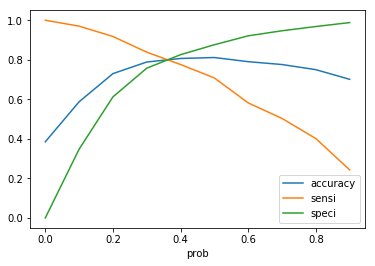

In [143]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [144]:
## 0.38 is the optimum probability

In [145]:
y_train_pred_pca['pca_predicted'] = y_train_pred_pca.pca_conv_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_pca.head()

,Converted,pca_conv_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,pca_predicted
0,0,0.172931,3009,1,1,0,0,0,0,0,0,0,0,0
1,0,0.292205,1012,1,1,1,0,0,0,0,0,0,0,0
2,0,0.191959,9226,1,1,0,0,0,0,0,0,0,0,0
3,1,0.910925,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.812909,7987,1,1,1,1,1,1,1,1,1,0,1


In [146]:
print("Overall Accuracy :", metrics.accuracy_score(y_train_pred_pca.Converted, y_train_pred_pca.pca_predicted))
confusion_pca = metrics.confusion_matrix(y_train_pred_pca.Converted, y_train_pred_pca.pca_predicted )
TP = confusion_pca[1,1] # true positive 
TN = confusion_pca[0,0] # true negatives
FP = confusion_pca[0,1] # false positives
FN = confusion_pca[1,0] # false negatives

print("Sensitivity :" ,TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive Rate :", FP/ float(TN+FP)) # predicting lead when there is no lead
print("Positive Predicted Value :",TP / float(TP+FP))
print("Negative Predicted Value :", TN / float(TN+ FN))
print("Precision Score :",precision_score(y_train_pred_pca.Converted, y_train_pred_pca.pca_predicted))

Overall Accuracy : 0.8019209573295544
Sensitivity : 0.7874080130825838
Specificity : 0.81101152368758
False Positive Rate : 0.18898847631241997
Positive Predicted Value : 0.722972972972973
Negative Predicted Value : 0.858963927312178
Precision Score : 0.722972972972973


### Precision is 0.72, lets change the probability to increase the precision....

In [147]:
y_train_pred_pca['pca_predict_1'] = y_train_pred_pca.pca_conv_Prob.map( lambda x: 1 if x > 0.60 else 0)
print("Overall Accuracy :", metrics.accuracy_score(y_train_pred_pca.Converted, y_train_pred_pca.pca_predict_1))
confusion_pca = metrics.confusion_matrix(y_train_pred_pca.Converted, y_train_pred_pca.pca_predict_1 )
TP = confusion_pca[1,1] # true positive 
TN = confusion_pca[0,0] # true negatives
FP = confusion_pca[0,1] # false positives
FN = confusion_pca[1,0] # false negatives

print("Sensitivity :" ,TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive Rate :", FP/ float(TN+FP)) # predicting lead when there is no lead
print("Positive Predicted Value :",TP / float(TP+FP))
print("Negative Predicted Value :", TN / float(TN+ FN))
print("Precision Score :",precision_score(y_train_pred_pca.Converted, y_train_pred_pca.pca_predict_1))

Overall Accuracy : 0.7904267044559912
Sensitivity : 0.5817661488143908
Specificity : 0.9211267605633803
False Positive Rate : 0.07887323943661972
Positive Predicted Value : 0.8220681686886193
Negative Predicted Value : 0.7785714285714286
Precision Score : 0.8220681686886193


In [148]:
confusion_pca

array([[3597,  308],
       [1023, 1423]], dtype=int64)

### Do it on Test data frame

In [149]:
df_test_pca2 = pca_again.transform(X_test_pca)
df_test_pca2.shape

(2723, 12)

In [150]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.86'

In [151]:
#Prepare Test Data Frame
y_test_pred_pca = pd.DataFrame({'Converted_actual':y_test.values, 'pca_conv_prob':pred_probs_test2})
y_test_pred_pca['Lead Number'] = y_test.index
y_test_pred_pca.head()

,Converted_actual,pca_conv_prob,Lead Number
0,0,0.150049,3271
1,1,0.927127,1490
2,0,0.165725,7936
3,1,0.911853,4216
4,0,0.070315,3830


In [152]:
y_test_pred_pca['pca_predicted'] = y_test_pred_pca.pca_conv_prob.map(lambda x: 1 if x > 0.38 else 0)
y_test_pred_pca.head()

,Converted_actual,pca_conv_prob,Lead Number,pca_predicted
0,0,0.150049,3271,0
1,1,0.927127,1490,1
2,0,0.165725,7936,0
3,1,0.911853,4216,1
4,0,0.070315,3830,0


In [153]:
print("Overall Accuracy :", metrics.accuracy_score(y_test_pred_pca.Converted_actual, y_test_pred_pca.pca_predicted))
confusion_pca_f = metrics.confusion_matrix(y_test_pred_pca.Converted_actual, y_test_pred_pca.pca_predicted )
TP = confusion_pca_f[1,1] # true positive 
TN = confusion_pca_f[0,0] # true negatives
FP = confusion_pca_f[0,1] # false positives
FN = confusion_pca_f[1,0] # false negatives

print("Sensitivity :" ,TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive Rate :", FP/ float(TN+FP)) # predicting lead when there is no lead
print("Positive Predicted Value :",TP / float(TP+FP))
print("Negative Predicted Value :", TN / float(TN+ FN))
print("Precision Score :",precision_score(y_test_pred_pca.Converted_actual, y_test_pred_pca.pca_predicted))
print("Recall Score :",recall_score(y_test_pred_pca.Converted_actual, y_test_pred_pca.pca_predicted))

Overall Accuracy : 0.8009548292324642
Sensitivity : 0.7745197168857432
Specificity : 0.8160322952710496
False Positive Rate : 0.1839677047289504
Positive Predicted Value : 0.7059907834101382
Negative Predicted Value : 0.8638583638583639
Precision Score : 0.7059907834101382
Recall Score : 0.7745197168857432


### Output of test data set matches with Train data set, so this model is stable and can be opted.

In [154]:
y_test_pred_pca['pca_predict_1'] = y_test_pred_pca.pca_conv_prob.map(lambda x: 1 if x > 0.6 else 0)
print("Overall Accuracy :", metrics.accuracy_score(y_test_pred_pca.Converted_actual, y_test_pred_pca.pca_predict_1))
confusion_pca_f = metrics.confusion_matrix(y_test_pred_pca.Converted_actual, y_test_pred_pca.pca_predict_1 )
TP = confusion_pca_f[1,1] # true positive 
TN = confusion_pca_f[0,0] # true negatives
FP = confusion_pca_f[0,1] # false positives
FN = confusion_pca_f[1,0] # false negatives

print("Sensitivity :" ,TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive Rate :", FP/ float(TN+FP)) # predicting lead when there is no lead
print("Positive Predicted Value :",TP / float(TP+FP))
print("Negative Predicted Value :", TN / float(TN+ FN))
print("Precision Score :",precision_score(y_test_pred_pca.Converted_actual, y_test_pred_pca.pca_predict_1))
print("Recall Score :",recall_score(y_test_pred_pca.Converted_actual, y_test_pred_pca.pca_predict_1))

Overall Accuracy : 0.7954461990451708
Sensitivity : 0.5662285136501517
Specificity : 0.9261822376009228
False Positive Rate : 0.07381776239907728
Positive Predicted Value : 0.813953488372093
Negative Predicted Value : 0.7891891891891892
Precision Score : 0.813953488372093
Recall Score : 0.5662285136501517


# Conclusion : Chosing RFE model over PCA as with 0.65 probability it has higher accuracy and more precision